# Week 1: Basic operations and Environmental Justice

The **objectives** of this lecture are to introduce basic operations in Python; build dataframes from scratch; import libraries and data; and to start to plot data.  The (very curtailed) Lab for this week will ask you to create a `DataFrame` from scratch and plot variables against each other.  _The second lab will ask for more real-world applied work in environmental justice._

## Basic operations

Programs are made up of **expressions**, which describe to the computer how to combine pieces of data. For example, a multiplication expression consists of a `*` symbol between two numerical expressions. Expressions, such as `3 * 4`, are **evaluated** by the computer. The value (the result of evaluation) of the last expression in each cell, `12` in this case, is displayed below the cell.

In [2]:
3 * 4

12

Data science often involves combining numerical values, and the set of operators in a programming language are designed to so that expressions can be used to express any sort of arithmetic. In Python, the following operators are essential.

| Expression Type | Operator | Example    | Value     |
|-----------------|----------|------------|-----------|
| Addition        | `+`      | `2 + 3`    | `5`       |
| Subtraction     | `-`      | `2 - 3`    | `-1`      |
| Multiplication  | `*`      | `2 * 3`    | `6`       |
| Division        | `/`      | `7 / 3`    | `2.66667` |
| Remainder       | `%`      | `7 % 3`    | `1`       |
| Exponentiation  | `**`     | `2 ** 0.5` | `1.41421` |

Names are given to values in Python using an assignment statement. In an **assignment**, a name is followed by `=`, which is followed by any expression. The value of the expression to the right of `=` is assigned to the name. Once a name has a value assigned to it, the value will be substituted for that name in future expressions.

In [5]:
y = 2 + 4

In [4]:
y

6

## Building a data table

We will be working with data tables often in the class, which is one convenient way to organize the type of data we encounter often in the social sciences.  The rows of the table are observations and the columns are variables or attributes of that observation.  We can build a table from scratch by using Python dictionaries. 

Define and assign a dictionary:

In [6]:
my_dictionary = {"a": 2, "b": 3}

The `my_dictionary` object represents, here, an observation with two attributes, `a` and `b`.  Maybe this observation represents the height and weight of an individual, or maybe the tax rate and prevailing interest rate of a country. Either way, it's a useful way to organize information, and you can access the value of `a`:

In [7]:
my_dictionary["a"]

2

Another useful construct is the `list`, indicated by square brackets (rather than the curly brackets for a dictionary). A list is a sequence of values, with no keys -- just a position in the list (e.g., `2` is in the first position):

In [12]:
my_list = [2, 3, 4]

You can grab a value at a certain position, like the value in the first position:

In [13]:
my_list[0]

2

Python is zero-indexed, so the first index is `0` and the second is `1` and so on. Lists are a consititional component of for-loops, which iterate over the values of a list. Each value is temporarily assigned to, in this case, the variable `i`.  The value is replaced by the next value in the list, until there are no more values.  *Note the indentation for everything that should be executed within each loop.*

In [14]:
for i in my_list:
    print(i + 100)

102
103
104


The results of a for-loop aren't, by default, captured into a single object.  Another very Pythonic construct is a *list comprehension*, which builds a for-loop into a list.  The result of each iteration is captured in the returned list.

In [15]:
[i + 100 for i in my_list]

[102, 103, 104]

In [16]:
res = [i + 100 for i in my_list]
res[1]

103

A table can be formulated as a **list** of **records**, where each record is represented by a dictionary.  There are two observations in this list:

In [18]:
my_table_list = [
    {"a": 2, "b": 3},
    {"a": 102, "b": 103}
]

A convenient way to organize these records and attributes is as a rectangular table, or in this case a Pandas `DataFrame`.  The list of records is an input.

In [19]:
import pandas

In [20]:
df = pandas.DataFrame(my_table_list)
df

,a,b
0,2,3
1,102,103


Extract a column:

In [21]:
df["a"]

0      2
1    102
Name: a, dtype: int64

Index the column using a different, mostly equivalent, notation:

In [23]:
df.a

0      2
1    102
Name: a, dtype: int64

Adding a new column to a `DataFrame` is a simple assignment using the column indexing. The `+` operation on `DataFrame` columns creates an element-wise addition:

In [24]:
df["c"] = df["a"] + df["b"]
df

,a,b,c
0,2,3,5
1,102,103,205


Similarly, a column can be created based on a condition, rather than a straight operation.  The following creates a new column `big` based on whether the row-element in column `a` is greater than 100. A boolean (`True` vs. `False`) is returned based on whether the condition is met:

In [27]:
import numpy
df["big"] = numpy.where(df.a > 100, True, False)
df

,a,b,c,big
0,2,3,5,False
1,102,103,205,True


## Environmental Justice: Real data

The Biden Administration [released a memo](https://www.whitehouse.gov/briefing-room/statements-releases/2021/01/27/fact-sheet-president-biden-takes-executive-actions-to-tackle-the-climate-crisis-at-home-and-abroad-create-jobs-and-restore-scientific-integrity-across-federal-government/) within the first week of their term, which addressed environmental justice. The two most important items for this class are:

> The order creates a government-wide Justice40 Initiative with the goal of delivering 40 percent of the overall benefits of relevant federal investments to disadvantaged communities and tracks performance toward that goal through the establishment of an Environmental Justice Scorecard.

> The order initiates the development of a Climate and Environmental Justice Screening Tool, building off EPA’s EJSCREEN, to identify disadvantaged communities, support the Justice40 Initiative, and inform equitable decision making across the federal government
    
It is very, very difficult - maybe even impossible - to quantify environmental justice, or even what constitutes a *disadvantaged community*. The EPA has tried. There are fundamental issues with their data and their math. We can begin to show why and how.

First, read in the data from a local directory. I have cleaned the data.

In [29]:
df = pandas.read_csv("https://raw.githubusercontent.com/danhammer/envirods/main/data/EJSCREEN_demo.csv")
df.head()

,ID,P_LDPNT,P_LDPNT_D2,VULEOPCT
0,10010201001,60.382488,38.762556,0.274371
1,10010201002,41.403686,32.680975,0.189588
2,10010202001,45.651211,74.665031,0.588895
3,10010202002,66.398228,78.826782,0.471891
4,10010203001,35.884283,44.665845,0.324309


The index that the EPA uses to prioritize communities for Federal funding is based on a simple, algebraic expression:

$$\mbox{justice} = \mbox{environmental quality } \times \mbox{ demographic index } \times \mbox{ population}$$

where 

$$\mbox{demographic index} = \frac{[\% \mbox{minority}] + [\% \mbox{living below 2x federal poverty line}]}{2} - \mbox{ [national average]}$$

Just looking at this expression, you can imagine that there are some strange edge cases - communities that are on the border of the national average of demographics that have very different prioritization outcomes.  The data dictionary can be [downloaded directly from the EPA's FTP servers](https://gaftp.epa.gov/EJSCREEN/2020/2020_EJSCREEEN_columns-explained.xlsx).

First, create a demographic index in line with the EPA's equation, as well as a variable that indicates whether the Census block has particularly high values of lead paint exposure (above the 90th percentile).

In [31]:
df["demo_index"] = df.VULEOPCT - df.VULEOPCT.mean()
df["index_thresh"] = numpy.where(df.P_LDPNT > 90, True, False)
df.head()

,ID,P_LDPNT,P_LDPNT_D2,VULEOPCT,demo_index,index_thresh
0,10010201001,60.382488,38.762556,0.274371,-0.077346,False
1,10010201002,41.403686,32.680975,0.189588,-0.162129,False
2,10010202001,45.651211,74.665031,0.588895,0.237178,False
3,10010202002,66.398228,78.826782,0.471891,0.120174,False
4,10010203001,35.884283,44.665845,0.324309,-0.027408,False


Use `matplotlib` to plot the percentile of raw lead paint values for Census blocks against the EPA index based on lead paint exposure. Color the values for Census blocks with the highest levels of exposure to environmental harm.  A lot of the spread is driven by the demographic index (which isn't presented in this graph, but drives the value of the EPA index.)

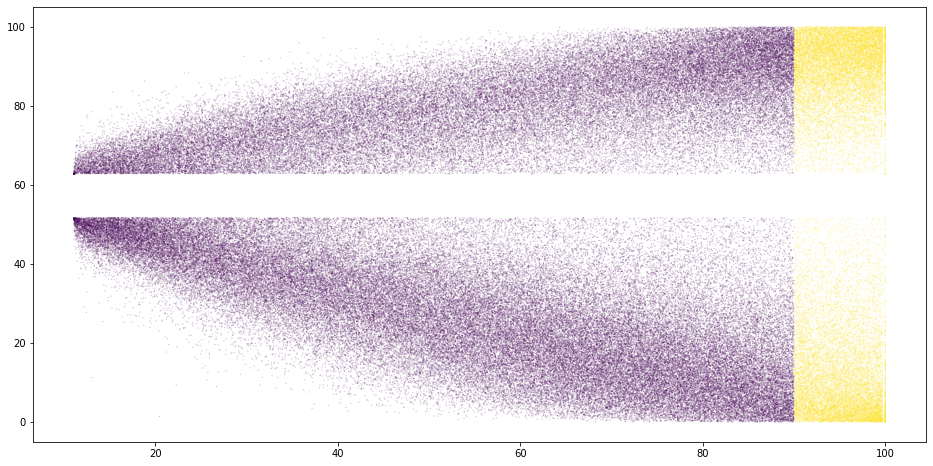

In [32]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 8))
plt.scatter(
    df.P_LDPNT, 
    df.P_LDPNT_D2, 
    s=0.01, 
    c=df.index_thresh
)

Plot the lead paint index against the demographic index. The majority of variation in the Lead Paint EJ Index (y-axis) is driven by the Demographic Index (x-axis) used by EJSCREEN, with a sharp discontinuity that is driven by whether a census block falls above or below the national average. The horizontal bar near the 60th percentile in this case is for census blocks with zero lead paint exposure. Census blocks with the highest levels of lead paint are highlighted in yellow.

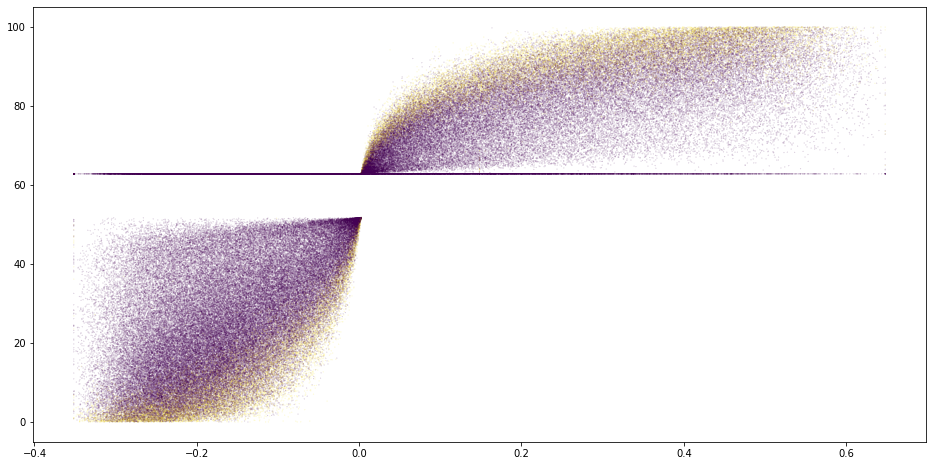

In [33]:
plt.figure(figsize=(16, 8))
plt.scatter(
    df.demo_index, 
    df.P_LDPNT_D2, 
    s=0.005, 
    c=df.index_thresh
)

The punchline is that, even if a Census block has an extreme amount of lead paint exposure (an environmental catastrophe), it won't be considered as part of the Justice40 funding if it falls (even slightly) on the privileged side of the National Average.  There is a sharp discontinuity.  There are no sharp discontinuities in the real-world, especially in justice-related work.  I don't know what the right answer is, but it can't be this.